In [10]:
import cffi
import os
import numpy as np
import pandas as pd
from io import StringIO
from enum import Enum
from Bio import SeqIO
from pathlib import Path
from modules.auxiliary import DATA_SEQ_DIR
from modules.pytrsomix import TRScalculator, TRSanalyzer, AlignmentAnalyzer
import matplotlib.pyplot as plt
from multiprocessing import Pool

# 100 - 25000, 8 genomów, w podejsciu cyrkularne, usiniecie znaku wiekszosci

# Reading in the genomes and calculating the interiors according the trs.txt file

In [13]:
trs_file = (DATA_SEQ_DIR/"klebsiella"/"trs.txt").absolute().as_posix().encode()
tmin=100
tmax=25000
trs1 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp1.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs1.calculate()

trs2 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp2.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs2.calculate()

trs3 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp3.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs3.calculate()

trs4 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp4.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs4.calculate()

trs5 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp5.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs5.calculate()

trs6 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp6.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs6.calculate()

trs7 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp7.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs7.calculate()

FileNotFoundError: [Errno 2] No such file or directory: b'/home/hubert/TRS-omix-main/data/klebsiella/Kp_Random.fasta'

# Instantiating the SequenceAnalyzer object

In [14]:
sa = TRSanalyzer.SeqAnalyzer([trs1.Result, trs2.Result, trs3.Result, trs4.Result, trs5.Result, trs6.Result, trs7.Result, trs_random.Result])
# remove the ">" character
sa.Combined[">SEQ"] = sa.Combined[">SEQ"].apply(lambda x: x[1:])
sa.Combined

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
0,2,4,CGGCGGCGG,9,2404,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
1,2,4,CGGCGGCGG,9,3439,3447,9,26,GCAGCAGCA,9,4374,4382,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,926,NC_016845.1
2,9,26,GCAGCAGCA,9,4374,4382,10,29,CTGCTGCTG,9,4819,4827,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,436,NC_016845.1
3,10,29,CTGCTGCTG,9,4819,4827,10,28,GCTGCTGCT,9,6481,6489,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,1653,NC_016845.1
4,10,28,GCTGCTGCT,9,6481,6489,2,5,GGCGGCGGC,9,6778,6786,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,288,NC_016845.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30504,4,12,TGGTGGTGG,9,5264298,5264306,14,41,TTCTTCTTC,9,5265424,5265432,TGCCGTCGACCATAAACAGCACCCGATCGGCCTGGGCAATCTCCTG...,1117,NZ_CP077823.1
30505,10,28,GCTGCTGCT,9,5265476,5265484,10,29,CTGCTGCTG,9,5266962,5266970,GAATAATGGTGACCAGGTTGCTGACGATGTAGTACACCACCAGGCC...,1477,NZ_CP077823.1
30506,10,29,CTGCTGCTG,9,5266962,5266970,3,8,CCACCACCA,9,5267382,5267390,GGGCTGCGGATTTTTGTCCTGCTCCCAGGCTTGCCAGATCATGAAA...,411,NZ_CP077823.1
30507,3,8,CCACCACCA,9,5267382,5267390,7,19,ACGACGACG,9,5267698,5267706,CGAAATCCATTGGCGGGAGTTCATGTTGACGCAAACGAAAACTTTC...,307,NZ_CP077823.1


In [15]:
sa.Combined.to_csv("all_klebsiella.csv", sep="\t", index= False)

In [16]:
tmp = pd.read_csv("all_klebsiella.csv", sep="\t")
sa = TRSanalyzer.SeqAnalyzer([])
sa.Combined = tmp
del tmp

<AxesSubplot:>

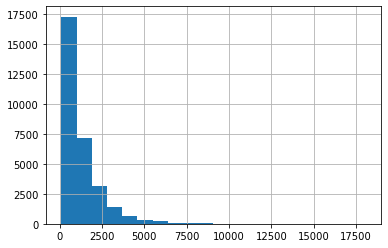

In [17]:
sa.Combined[">SEQ"].apply(lambda x: len(x)).hist(bins=20)

## Unique gnomes in the table

In [18]:
sa.Combined["GENOME"].unique()

array(['NC_016845.1', 'NZ_CP084876.1', 'NZ_CP084765.1', 'NZ_CP084787.1',
       'NZ_CP113789.1', 'NZ_CP084768.1', 'NZ_CP077823.1'], dtype=object)

## Calculating the Needleman-Wunsch alignment scores with respect to chosen sequence

In [17]:
#algns = sa.calculate_all_alignments(0)

#^ results in:
#AttributeError                            Traceback (most recent call last)
#<ipython-input-13-988ec6953ba2> in <module>
#----> 1 algns = sa.calculate_all_alignments(0)

#AttributeError: 'SeqAnalyzer' object has no attribute 'calculate_all_alignments'
#should be:
algns = sa.calculate_all_alignments_nw(0)

## 10 most similar scores
* the first one in the similarity to itself (the highest possible score here...)

In [18]:
aa = AlignmentAnalyzer(algns)
most_similar = aa.get_sorted_scores().sort_values("score", ascending=False)[:10]
least_similar = aa.get_sorted_scores().sort_values("score", ascending=False)[-10:]
most_similar

,score
index,
0,6481
27075,4813
9623,4803
4403,4791
13839,4790
20308,4789
4903,4789
30184,4789
28785,4789


In [19]:
aa.get_sorted_scores().max()

score    6481
dtype: int64

In [20]:

sa.Combined.loc[most_similar.index, :]

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
index,,,,,,,,,,,,,,,
0,2,4,CGGCGGCGG,9,2404,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
27075,1,2,CGCCGCCGC,9,834295,834303,1,1,CCGCCGCCG,9,836215,836223,TGACCCCGTAGTAGAGCTGTTTAAAGCCGTCGCTGCGGCTGTAGCC...,1911,NZ_CP077823.1
9623,1,3,GCCGCCGCC,9,857735,857743,1,1,CCGCCGCCG,9,859534,859542,CGCATAGCCGGTCTGCACGCTATAGCTGAGGTTGTTGTCTTCCAGC...,1790,NZ_CP084765.1
4403,9,26,GCAGCAGCA,9,70891,70899,1,3,GCCGCCGCC,9,72717,72725,CCGACGATGATACCCCCGCCGGCACCAGGGCGATGCAGTTATCCCC...,1817,NZ_CP084876.1
13839,3,9,CACCACCACCAC,12,601007,601018,2,5,GGCGGCGGC,9,602654,602662,CTCGCTGGCATGGAAAAAAGCGCGTCTGATCCACTGCGTTTTCACC...,1635,NZ_CP084787.1
20308,2,6,GCGGCGGCGGCG,12,3355608,3355619,9,27,CAGCAGCAG,9,3357677,3357685,CAGCATCGTCTGCTGCTTTTTTCCCTTTCGGCTTGCCTTTACCTTT...,2057,NZ_CP113789.1
4903,3,9,CACCACCACCAC,12,621745,621756,2,5,GGCGGCGGC,9,623511,623519,CTCGCTGGCGTGGAAAAAAGCGCGTCTGATCCACTGCGTTTTCACC...,1754,NZ_CP084876.1
30184,3,9,CACCACCAC,9,4777212,4777220,4,10,GGTGGTGGT,9,4779148,4779156,GGGAGGCGGCGGTGGCGGCGGTGGCGCGTCGGCATTGATGGTAAAG...,1927,NZ_CP077823.1
28785,1,2,CGCCGCCGC,9,3039865,3039873,2,5,GGCGGCGGC,9,3041673,3041681,TCGCCGCTGGAGCCGGTGCTGCGCTCGCTGGTCAGCGCCCGCATCG...,1799,NZ_CP077823.1


In [21]:
most_similar.apply(lambda x: x/aa.get_sorted_scores().max().values[0])

,score
index,
0,1.000000
27075,0.742632
9623,0.741089
4403,0.739238
13839,0.739083
20308,0.738929
4903,0.738929
30184,0.738929
28785,0.738929


In [22]:
sa.Combined.loc[least_similar.index, :]

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
index,,,,,,,,,,,,,,,
21806,2,6,GCGGCGGCG,9,5237270,5237278,1,2,CGCCGCCGC,9,5249870,5249878,GGGTCAATGATATTGACGCGATCTACTTCACCCACGTCCATCCGGA...,12591,NZ_CP113789.1
3904,3,7,ACCACCACC,9,4837868,4837876,2,6,GCGGCGGCG,9,4850558,4850566,CAGGACGATATTTCTGACTATGTCGCCTCCAATGTCAAAGATCCTA...,12681,NC_016845.1
21244,3,9,CACCACCAC,9,4551776,4551784,14,41,TTCTTCTTC,9,4564654,4564662,CTGCAGATCGGGATAGGTGACGCGTAACAACTGTGCGGTTTTCAGA...,12869,NZ_CP113789.1
14775,9,27,CAGCAGCAG,9,1647286,1647294,20,58,TATTATTAT,9,1660767,1660775,GAGACGCATGACCATCGCCAGCATCAGACCAGTGATCCGCGCGCGG...,13472,NZ_CP084787.1
5628,9,25,AGCAGCAGC,9,1442804,1442812,11,32,ACAACAACA,9,1456497,1456505,GCAAATATCTGCCAATGGTGAACGCTGAGCATGCAATCATGCTGGC...,13684,NZ_CP084876.1
169,2,4,CGGCGGCGG,9,253441,253449,9,27,CAGCAGCAG,9,267279,267287,GAAGGACGCTTTGTCGAAGCGGATGGCGGCACGCTGTTTCTTGATG...,13829,NC_016845.1
13052,9,27,CAGCAGCAG,9,5148282,5148290,1,2,CGCCGCCGC,9,5163473,5163481,ATATTTTAATGAACTGGACATAATGCACCTGGCGTCAGCACAAGAA...,15182,NZ_CP084765.1
30066,17,49,ATCATCATC,9,4620429,4620437,11,33,CAACAACAA,9,4635711,4635719,GGTGAATGAGAGCGCTTACCCGTTATCTTCCCATTGGCGCTATCTA...,15273,NZ_CP077823.1
8457,11,31,AACAACAAC,9,4710533,4710541,18,52,GATGATGAT,9,4726237,4726245,CGAATTAGATGCATTGTTTGGCGATGCTGACATCAAAATTCTCGCT...,15695,NZ_CP084876.1


In [23]:
least_similar.apply(lambda x: x/13501)*100

,score
index,
21806,-37.656470
3904,-38.323087
21244,-39.715577
14775,-44.181912
5628,-45.752167
169,-46.826161
13052,-56.847641
30066,-57.521665
8457,-60.647359


## 10 most similar sequences

In [24]:
sa.Combined.loc[most_similar.index, :]

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
index,,,,,,,,,,,,,,,
0,2,4,CGGCGGCGG,9,2404,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
27075,1,2,CGCCGCCGC,9,834295,834303,1,1,CCGCCGCCG,9,836215,836223,TGACCCCGTAGTAGAGCTGTTTAAAGCCGTCGCTGCGGCTGTAGCC...,1911,NZ_CP077823.1
9623,1,3,GCCGCCGCC,9,857735,857743,1,1,CCGCCGCCG,9,859534,859542,CGCATAGCCGGTCTGCACGCTATAGCTGAGGTTGTTGTCTTCCAGC...,1790,NZ_CP084765.1
4403,9,26,GCAGCAGCA,9,70891,70899,1,3,GCCGCCGCC,9,72717,72725,CCGACGATGATACCCCCGCCGGCACCAGGGCGATGCAGTTATCCCC...,1817,NZ_CP084876.1
13839,3,9,CACCACCACCAC,12,601007,601018,2,5,GGCGGCGGC,9,602654,602662,CTCGCTGGCATGGAAAAAAGCGCGTCTGATCCACTGCGTTTTCACC...,1635,NZ_CP084787.1
20308,2,6,GCGGCGGCGGCG,12,3355608,3355619,9,27,CAGCAGCAG,9,3357677,3357685,CAGCATCGTCTGCTGCTTTTTTCCCTTTCGGCTTGCCTTTACCTTT...,2057,NZ_CP113789.1
4903,3,9,CACCACCACCAC,12,621745,621756,2,5,GGCGGCGGC,9,623511,623519,CTCGCTGGCGTGGAAAAAAGCGCGTCTGATCCACTGCGTTTTCACC...,1754,NZ_CP084876.1
30184,3,9,CACCACCAC,9,4777212,4777220,4,10,GGTGGTGGT,9,4779148,4779156,GGGAGGCGGCGGTGGCGGCGGTGGCGCGTCGGCATTGATGGTAAAG...,1927,NZ_CP077823.1
28785,1,2,CGCCGCCGC,9,3039865,3039873,2,5,GGCGGCGGC,9,3041673,3041681,TCGCCGCTGGAGCCGGTGCTGCGCTCGCTGGTCAGCGCCCGCATCG...,1799,NZ_CP077823.1


In [25]:
sa.Combined[">SEQ"].unique()

array(['CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCATATCGGTCAGGTGCAGTGCGGCGTATGGCCGGCGCAGGTTCGCGAAAGCGTTTCCGCGCTGCTGTAACGATTAGCGCCGCCAGCGTCGCAGCAGGCGGCTACGCAGCCCGGTGTCAAAGCGCCAGATATGATCGAAGATGCGCATGATGCCGGGTTTGCCGTGAACCGACATCGCCACCGCGTGAAAACGGTGCTGATGCTTACGCTGTAACTCCCCCACCTGAGCAATCACCTCATCCGGCAACCGTTGGGCAATAAAGTCGGAGATCACCACGGCATCCGCATCCACCCACTGCGGGTTTTGCAAACGTTCAATAATGGCGCGAAAACAGCTGGCCAGATCGGTGCCGCCGCGAAAACGCTGGCTCAGGAAACGGATCGCCTGCTCCAGTCCGCTCTCGCTGGTCAACTCGTAATGCACTACTTCGCTGGAAAACAGCATAATGAAGCAGCGACGGTTATCGGCCAGCGCGATGCGCATCAGGGCCAGACAAAAGGCCTTAGCGCACTGTTCGTTAAAACCGCCCATCGATCCTGACGTATCGACGCAGACAATGAACGGCCCGCGCGGTTGCTCATCAAAATCCTGCCGCGTTACCGGGCGTTCGGTAATTTTCTCGCGCCAGGCATCGCCGTGTAGCCGGTAGGTGAGCAGCTGTTTCTCCACCAGCTTGCGATAAAATTCAAACTCCAGCTCCGTGATGCCAAGCGTCGCCAGCTCCGGCGGCAGCAGGCGTAGAATGTCGTCGCTCTGCTGGAGGCCGTCGACCTGTTCAGGCACCGTTGCCGGCTCGCGTACCAGGCTGCGGAAGGTTTCCATCGGCGCATCTTTCTTCGGCACGGATTTCGCTTCCCTTGAACGCCCCAGCTGTTCCGCCAGCTGCAGCAGCTCCGGTTGCTGGTTAAGAAAATCGCCATAGCGCACGATCAGCTGGTAGTCGCCTCGT

In [26]:
len(sa.Combined[">SEQ"].unique())

30374

* podobieństwo sekwencji
* dla genomów avium szukamy najbardziej unikatowej sekwencji dla danego genomu

In [28]:
least_similar_avium = {}
for idx in range(10):
    print("Alignment calculation, %d", idx)
    algns = sa.calculate_all_alignments_nw(idx)
    aa = AlignmentAnalyzer(algns)
    least_similar = aa.get_sorted_scores().sort_values("score", ascending=False)[-10:]
    least_similar_avium[idx] = least_similar

Alignment calculation, %d 0
Alignment calculation, %d 1
Alignment calculation, %d 2
Alignment calculation, %d 3
Alignment calculation, %d 4
Alignment calculation, %d 5
Alignment calculation, %d 6
Alignment calculation, %d 7
Alignment calculation, %d 8
Alignment calculation, %d 9


# Entire matrix

In [29]:
def func(x):
    # print("Parallel at: ", x)
    algns = sa.calculate_all_alignments_nw(x)
    aa = AlignmentAnalyzer(algns)
    scores = aa.get_sorted_scores()
    return (x, scores)

In [30]:
def func(x):
    # print("Parallel at: ", x)
    algns = sa.calculate_all_alignments_sw(x)
    aa = AlignmentAnalyzer(algns)
    scores = aa.get_sorted_scores()
    return (x, scores)

In [31]:
sa.Combined.shape[0]

30509

In [32]:
slice_size = 16
slice_idx = 0
max_size = sa.Combined.shape[0]
beg = slice_idx * slice_size
end = (slice_idx + 1) * slice_size
algn_indices = list(range(beg, end))
algn_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [33]:
n_proc = 16
# algn_indices = list(range(sa.Combined.shape[0]))
pool = Pool(processes=n_proc)
res_nw = pool.map(func, algn_indices)
pool.close()

In [35]:
res_nw

[(0,
         score
  index       
  0       6481
  1       3763
  2       2031
  3       4572
  4       1346
  ...      ...
  30504   4088
  30505   4496
  30506   1807
  30507   1328
  30508   4043
  
  [30509 rows x 1 columns]),
 (1,
         score
  index       
  0       3763
  1       5798
  2       2015
  3       4119
  4       1334
  ...      ...
  30504   3831
  30505   4100
  30506   1786
  30507   1302
  30508   3780
  
  [30509 rows x 1 columns]),
 (2,
         score
  index       
  0       2031
  1       2015
  2       2731
  3       1955
  4       1241
  ...      ...
  30504   2024
  30505   2012
  30506   1527
  30507   1257
  30508   1964
  
  [30509 rows x 1 columns]),
 (3,
         score
  index       
  0       4572
  1       4119
  2       1955
  3      10062
  4       1335
  ...      ...
  30504   4762
  30505   5620
  30506   1760
  30507   1341
  30508   4732
  
  [30509 rows x 1 columns]),
 (4,
         score
  index       
  0       1346
  1       1334
  2    

In [36]:
similarity_matrix_nw = pd.DataFrame(index=sa.Combined.index)
for col in res_nw:
    tmptmp = col[1]
    tmptmp.columns = [col[0]]
    similarity_matrix_nw = pd.concat([similarity_matrix_nw, tmptmp], axis=1)

In [37]:
similarity_matrix_nw = pd.concat([similarity_matrix_nw, sa.Combined], axis=1)
similarity_matrix_nw

,0,1,2,3,4,5,6,7,8,9,...,R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
0,6481,3763,2031,4572,1346,2991,1640,737,4740,3395,...,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
1,3763,5798,2015,4119,1334,2882,1600,743,4193,3194,...,3447,9,26,GCAGCAGCA,9,4374,4382,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,926,NC_016845.1
2,2031,2015,2731,1955,1241,1905,1422,735,2022,1989,...,4382,10,29,CTGCTGCTG,9,4819,4827,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,436,NC_016845.1
3,4572,4119,1955,10062,1335,3024,1625,720,6611,3603,...,4827,10,28,GCTGCTGCT,9,6481,6489,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,1653,NC_016845.1
4,1346,1334,1241,1335,1802,1331,1133,701,1342,1333,...,6489,2,5,GGCGGCGGC,9,6778,6786,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,288,NC_016845.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30504,4088,3831,2024,4762,1331,3034,1605,738,5117,3409,...,5264306,14,41,TTCTTCTTC,9,5265424,5265432,TGCCGTCGACCATAAACAGCACCCGATCGGCCTGGGCAATCTCCTG...,1117,NZ_CP077823.1
30505,4496,4100,2012,5620,1320,3097,1663,737,6187,3634,...,5265484,10,29,CTGCTGCTG,9,5266962,5266970,GAATAATGGTGACCAGGTTGCTGACGATGTAGTACACCACCAGGCC...,1477,NZ_CP077823.1
30506,1807,1786,1527,1760,1172,1728,1341,680,1810,1715,...,5266970,3,8,CCACCACCA,9,5267382,5267390,GGGCTGCGGATTTTTGTCCTGCTCCCAGGCTTGCCAGATCATGAAA...,411,NZ_CP077823.1
30507,1328,1302,1257,1341,1052,1339,1156,736,1343,1311,...,5267390,7,19,ACGACGACG,9,5267698,5267706,CGAAATCCATTGGCGGGAGTTCATGTTGACGCAAACGAAAACTTTC...,307,NZ_CP077823.1


In [39]:
similarity_matrix = pd.concat([similarity_matrix_nw, sa.Combined], axis=1)
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
0,6481,3763,2031,4572,1346,2991,1640,737,4740,3395,...,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
1,3763,5798,2015,4119,1334,2882,1600,743,4193,3194,...,3447,9,26,GCAGCAGCA,9,4374,4382,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,926,NC_016845.1
2,2031,2015,2731,1955,1241,1905,1422,735,2022,1989,...,4382,10,29,CTGCTGCTG,9,4819,4827,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,436,NC_016845.1
3,4572,4119,1955,10062,1335,3024,1625,720,6611,3603,...,4827,10,28,GCTGCTGCT,9,6481,6489,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,1653,NC_016845.1
4,1346,1334,1241,1335,1802,1331,1133,701,1342,1333,...,6489,2,5,GGCGGCGGC,9,6778,6786,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,288,NC_016845.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30504,4088,3831,2024,4762,1331,3034,1605,738,5117,3409,...,5264306,14,41,TTCTTCTTC,9,5265424,5265432,TGCCGTCGACCATAAACAGCACCCGATCGGCCTGGGCAATCTCCTG...,1117,NZ_CP077823.1
30505,4496,4100,2012,5620,1320,3097,1663,737,6187,3634,...,5265484,10,29,CTGCTGCTG,9,5266962,5266970,GAATAATGGTGACCAGGTTGCTGACGATGTAGTACACCACCAGGCC...,1477,NZ_CP077823.1
30506,1807,1786,1527,1760,1172,1728,1341,680,1810,1715,...,5266970,3,8,CCACCACCA,9,5267382,5267390,GGGCTGCGGATTTTTGTCCTGCTCCCAGGCTTGCCAGATCATGAAA...,411,NZ_CP077823.1
30507,1328,1302,1257,1341,1052,1339,1156,736,1343,1311,...,5267390,7,19,ACGACGACG,9,5267698,5267706,CGAAATCCATTGGCGGGAGTTCATGTTGACGCAAACGAAAACTTTC...,307,NZ_CP077823.1


In [42]:
def seq_info(idx, similarity_matrix, col_name=">SEQ"):
    print(similarity_matrix_sw.loc[idx, ">SEQ"])
    print(len(similarity_matrix_sw.loc[idx, ">SEQ"]))

In [43]:
for idx in algn_indices:
    seq_info(idx=idx, similarity_matrix=similarity_matrix_nw)

CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCATATCGGTCAGGTGCAGTGCGGCGTATGGCCGGCGCAGGTTCGCGAAAGCGTTTCCGCGCTGCTGTAACGATTAGCGCCGCCAGCGTCGCAGCAGGCGGCTACGCAGCCCGGTGTCAAAGCGCCAGATATGATCGAAGATGCGCATGATGCCGGGTTTGCCGTGAACCGACATCGCCACCGCGTGAAAACGGTGCTGATGCTTACGCTGTAACTCCCCCACCTGAGCAATCACCTCATCCGGCAACCGTTGGGCAATAAAGTCGGAGATCACCACGGCATCCGCATCCACCCACTGCGGGTTTTGCAAACGTTCAATAATGGCGCGAAAACAGCTGGCCAGATCGGTGCCGCCGCGAAAACGCTGGCTCAGGAAACGGATCGCCTGCTCCAGTCCGCTCTCGCTGGTCAACTCGTAATGCACTACTTCGCTGGAAAACAGCATAATGAAGCAGCGACGGTTATCGGCCAGCGCGATGCGCATCAGGGCCAGACAAAAGGCCTTAGCGCACTGTTCGTTAAAACCGCCCATCGATCCTGACGTATCGACGCAGACAATGAACGGCCCGCGCGGTTGCTCATCAAAATCCTGCCGCGTTACCGGGCGTTCGGTAATTTTCTCGCGCCAGGCATCGCCGTGTAGCCGGTAGGTGAGCAGCTGTTTCTCCACCAGCTTGCGATAAAATTCAAACTCCAGCTCCGTGATGCCAAGCGTCGCCAGCTCCGGCGGCAGCAGGCGTAGAATGTCGTCGCTCTGCTGGAGGCCGTCGACCTGTTCAGGCACCGTTGCCGGCTCGCGTACCAGGCTGCGGAAGGTTTCCATCGGCGCATCTTTCTTCGGCACGGATTTCGCTTCCCTTGAACGCCCCAGCTGTTCCGCCAGCTGCAGCAGCTCCGGTTGCTGGTTAAGAAAATCGCCATAGCGCACGATCAGCTGGTAGTCGCCTCGTTTGAGTTC

In [48]:
seq_info(idx=30508, similarity_matrix=similarity_matrix_nw)

TGCCAGAACCTGACGACCATTTTTAGTAGCCATACGAGCACGGAAGCCGTGAGAACGGTTGCGCTTCAGTACAGACGGTTGAAAAGTGCGTTTCATGGCGATTTCTACCTAAACTTGAATAAATTCACTGACTTTTGCGTAGACCCGAACGAACTTCGAACGACTTACGCCTCAGCGTGGGTGATTAAAGAGGCCGGATTGTAATAATTGTACACTCCGGAGTCAATTCTCTTTCCTTATTTCTCGCACCTCGTCGCACAAAAAATAAGCTGAGACGCGTGACGAAAACGGGCATTACGCGCCGGGTGGGGGATTATACGGCCTGGCTGGTAAAGCGCAAGGATCCGCAAGGATCTTTATTAGATCGTTTCCGCCCAAAAGCGGCATAGCTCATTAATTTTTCCAATATGCGGCGGAAATCGTGCTTCACTCCCCGCAGGATCGATTACACTTACCCGGTTTCGATCCTTCCTGTGGATAAATCGGGAAGAATCTGTTGAGAAACACAAGATCTCTTTCTCAGTTTAGGCTATGATCCCCGGTCCCGATCGCGATCCCCGGATCCGCAGCGGGTAATAACCGCAGATAGCGGTTCGCACGTCACCCCTTTTGTGCAGGGGCTTTTCGGCTAATGCAGGGTCTTGTCGACGTGTGCCAACAATCACGATTGTTTCAGTTTTTCTTTGATATCGATTTTATGTTCGAGTGGAGTCCGCCGTGTCACTTTCGCTTTGGCAGCAGTGTCTTGCCCGATTGCAGGATGAGTTACCAGCCACAGAATTCAGCATGTGGATCCGCCCATTGCAGGCGGAACTGAGCGATAACACGCTGGCACTGTATGCGCCAAACCGTTTTGTGCTCGACTGGGTAAGGGACAAATACCTCAATAATATCAATGGACTCCTCAATGATTTTTGCGGTGCGGACGCCCCGCAGCTGCGTTTTGAGGTGGGCGCTAAGCCCGCCAGCTCGCTGCAGAAAGGGACGGTAAGCCCGGCTG

In [49]:
seq_info(idx=0, similarity_matrix=similarity_matrix_nw)

CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCATATCGGTCAGGTGCAGTGCGGCGTATGGCCGGCGCAGGTTCGCGAAAGCGTTTCCGCGCTGCTGTAACGATTAGCGCCGCCAGCGTCGCAGCAGGCGGCTACGCAGCCCGGTGTCAAAGCGCCAGATATGATCGAAGATGCGCATGATGCCGGGTTTGCCGTGAACCGACATCGCCACCGCGTGAAAACGGTGCTGATGCTTACGCTGTAACTCCCCCACCTGAGCAATCACCTCATCCGGCAACCGTTGGGCAATAAAGTCGGAGATCACCACGGCATCCGCATCCACCCACTGCGGGTTTTGCAAACGTTCAATAATGGCGCGAAAACAGCTGGCCAGATCGGTGCCGCCGCGAAAACGCTGGCTCAGGAAACGGATCGCCTGCTCCAGTCCGCTCTCGCTGGTCAACTCGTAATGCACTACTTCGCTGGAAAACAGCATAATGAAGCAGCGACGGTTATCGGCCAGCGCGATGCGCATCAGGGCCAGACAAAAGGCCTTAGCGCACTGTTCGTTAAAACCGCCCATCGATCCTGACGTATCGACGCAGACAATGAACGGCCCGCGCGGTTGCTCATCAAAATCCTGCCGCGTTACCGGGCGTTCGGTAATTTTCTCGCGCCAGGCATCGCCGTGTAGCCGGTAGGTGAGCAGCTGTTTCTCCACCAGCTTGCGATAAAATTCAAACTCCAGCTCCGTGATGCCAAGCGTCGCCAGCTCCGGCGGCAGCAGGCGTAGAATGTCGTCGCTCTGCTGGAGGCCGTCGACCTGTTCAGGCACCGTTGCCGGCTCGCGTACCAGGCTGCGGAAGGTTTCCATCGGCGCATCTTTCTTCGGCACGGATTTCGCTTCCCTTGAACGCCCCAGCTGTTCCGCCAGCTGCAGCAGCTCCGGTTGCTGGTTAAGAAAATCGCCATAGCGCACGATCAGCTGGTAGTCGCCTCGTTTGAGTTC

In [ ]:
seq_info(idx=31537, similarity_matrix=similarity_matrix)

In [ ]:
seq_info(idx=31538, similarity_matrix=similarity_matrix)

In [50]:
(210 * (sa.Combined.shape[0]/16)) / 3600

111.23072916666666

In [51]:
similarity_matrix.to_csv("Klebsiella_NW_alignment_16_seqs.csv", sep=";")

In [19]:
df = pd.DataFrame(sa.Combined)

def extract_sequences(df, seq_column, l_chars, r_chars): 
# Create new columns SEQ_L and SEQ_R by slicing the sequence column
    df['SEQ_L'] = df[seq_column].str.slice(0, l_chars)
    df['SEQ_R'] = df[seq_column].str.slice(-r_chars)    
    return df

In [20]:
extract_sequences(df,'>SEQ',50,50)

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME,SEQ_L,SEQ_R
0,2,4,CGGCGGCGG,9,2404,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,CTGGTAGTCGCCTCGTTTGAGTTCGCCGGCGCTCATATCCCACAGG...
1,2,4,CGGCGGCGG,9,3439,3447,9,26,GCAGCAGCA,9,4374,4382,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,926,NC_016845.1,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,TTCAAAAGTAATGTGGATCACTTCCATATCGTGAAGTTTGAGCGGC...
2,9,26,GCAGCAGCA,9,4374,4382,10,29,CTGCTGCTG,9,4819,4827,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,436,NC_016845.1,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,AGCTGGAATATCAGCTCAAACACCGCGTCCGGCAGTTTAATATTGC...
3,10,29,CTGCTGCTG,9,4819,4827,10,28,GCTGCTGCT,9,6481,6489,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,1653,NC_016845.1,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,TTCTCCGTCGTGCTGCCCTCGTTGGTGCTGAACTATTTTGGCCAGG...
4,10,28,GCTGCTGCT,9,6481,6489,2,5,GGCGGCGGC,9,6778,6786,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,288,NC_016845.1,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,TACGTTTCTGTGGTCATCGTTATCGTCAGCTTTGAGCATTCGTCTA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30504,4,12,TGGTGGTGG,9,5264298,5264306,14,41,TTCTTCTTC,9,5265424,5265432,TGCCGTCGACCATAAACAGCACCCGATCGGCCTGGGCAATCTCCTG...,1117,NZ_CP077823.1,TGCCGTCGACCATAAACAGCACCCGATCGGCCTGGGCAATCTCCTG...,ACTAATGAAGCCAACGCATCTGCGGCTTGAAGAATGAAGAGTATCA...
30505,10,28,GCTGCTGCT,9,5265476,5265484,10,29,CTGCTGCTG,9,5266962,5266970,GAATAATGGTGACCAGGTTGCTGACGATGTAGTACACCACCAGGCC...,1477,NZ_CP077823.1,GAATAATGGTGACCAGGTTGCTGACGATGTAGTACACCACCAGGCC...,ACGCCCTGGTCGGCGGCGCTACCCGCTGCTGTGGTCGTAGTCTGCG...
30506,10,29,CTGCTGCTG,9,5266962,5266970,3,8,CCACCACCA,9,5267382,5267390,GGGCTGCGGATTTTTGTCCTGCTCCCAGGCTTGCCAGATCATGAAA...,411,NZ_CP077823.1,GGGCTGCGGATTTTTGTCCTGCTCCCAGGCTTGCCAGATCATGAAA...,CAACGCTTCCGAGAGAGCACGGTTATCGAGGTCGGCAACCCCTCTT...
30507,3,8,CCACCACCA,9,5267382,5267390,7,19,ACGACGACG,9,5267698,5267706,CGAAATCCATTGGCGGGAGTTCATGTTGACGCAAACGAAAACTTTC...,307,NZ_CP077823.1,CGAAATCCATTGGCGGGAGTTCATGTTGACGCAAACGAAAACTTTC...,CAGGGTTAGCTTTATTACTTGGAAACGGTCAGACGAGCGCGGCCTT...


In [21]:
#It would be good to implement a way to do that automatically - will look into it key match genome-taxa has
# to exist as analogous tool is available in R - started working on it results at the end 
genome_taxa_map = {
    'NC_016845.1': 'Klebsiella_pneumoniae_subsp_pneumoniae',
    'NZ_CP084876.1': 'Klebsiella_quasipneumoniae_subsp_quasipneumoniae',
    'NZ_CP084765.1': 'Klebsiella_variicola_subsp_variicola',
    'NZ_CP084787.1': 'Klebsiella_quasipneumoniae_subsp_similipneumoniae',
    'NZ_CP113789.1': 'Klebsiella_variicola_subsp_tropica',
    'NZ_CP084768.1': 'Klebsiella_quasivariicola',
    'NZ_CP077823.1': 'Klebsiella_africana'
}
df['Taxonomic_Name'] = df['GENOME'].map(genome_taxa_map)
unmatched_genomes = df[df['Taxonomic_Name'].isnull()]['GENOME'].unique()

if len(unmatched_genomes) > 0:
    print(f"Warning: Some genome IDs could not be matched with taxonomic names: {unmatched_genomes}")

df['L_id'] = df['Taxonomic_Name'] + '_L' + df['L-No'].astype(str)
df['R_id'] = df['Taxonomic_Name'] + '_R' + df['R-No'].astype(str)
df = df[['SEQ_L','SEQ_R','L_id','R_id']]
df

# Open a file for writing
with open('sequences_L.fasta', 'w') as fasta_file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Write the sequence name (L_id) preceded by '>'
        fasta_file.write(f'>{row["L_id"]}\n')
        # Write the sequence (SEQ_L)
        fasta_file.write(f'{row["SEQ_L"]}\n')

with open('sequences_R.fasta','w') as fasta_file:
    for index, row in df.iterrows():
        fasta_file.write(f'>{row["R_id"]}\n')
        fasta_file.write(f'{row["SEQ_R"]}\n')
        


In [22]:
#There is possibility of several sequences having the same name as such we need to make sure that all ids are unique
def rename_sequences(input_file, output_file):
    """
    Renames sequences in a FASTA file.

    Parameters:
        input_file (str): Path to the input FASTA file.
        output_file (str): Path to the output FASTA file with renamed sequences.
    """
    # Open input and output FASTA files
    with open(input_file, "r") as input_handle, open(output_file, "w") as output_handle:
        # Read sequences from input FASTA file and write to output with new names
        for i, record in enumerate(SeqIO.parse(input_handle, "fasta"), start=1):
            # Extract the original ID
            original_id = record.id
            # Rename the sequence using a combination of original ID and sequence number
            new_id = f"{original_id}_{i}"
            record.id = new_id
            record.description = ""
            # Write the updated record to the output file
            SeqIO.write(record, output_handle, "fasta")

# Call the function to rename sequences
rename_sequences("sequences_R.fasta", "sequences_R_unique.fasta")
rename_sequences("sequences_L.fasta","sequences_L_unique.fasta")
# This function incorporates index into sequence name making it easy to find the original sequence
# Remove original .fasta files
os.remove("sequences_R.fasta")
os.remove("sequences_L.fasta")

In [23]:
import subprocess
def run_cdhit(cdhit_path, input_file, output_file, c=0.9, n=5, d=0, m="t",g=0,G=1,sc=0):
    """
    Run CD-HIT program from Python.

    Parameters:
        cdhit_path (str): Path to the CD-HIT executable.
        input_file (str): Path to the input FASTA file.
        output_file (str): Path to the output file.
        c (float): Sequence identity threshold. Default is 0.9.
        n (int): Word length, default is 5.
        d (int): Bandwidth of alignment, default is 0.
        m (str): Memory limit, default is "t" for unlimited.
        g (int): def 0 
        G (int): def 0
        sc (int): def 0
    """
    # Construct the CD-HIT command
    cmd = [cdhit_path, "-i", input_file, "-o", output_file, "-c", str(c), "-n", str(n), "-d", str(d), "-M", m,
          "-g",str(g), "-G", str(G),"-sc",str(sc)]

    # Run CD-HIT command as a subprocess
    subprocess.run(cmd)

# Example usage:
run_cdhit("/home/hubert/cdhit-master/cd-hit-est","sequences_L_unique.fasta","sequences_L_unique_cdhit",
          c=1, n=5, d=0, m="t",g=1,sc=1)
run_cdhit("/home/hubert/cdhit-master/cd-hit-est","sequences_R_unique.fasta","sequences_R_unique_cdhit",
          c=1, n=5, d=0, m="t",g=1,sc=1)

In [18]:
def extract_sequence_ids(input_file, output_file):
    """
    Extract sequence IDs from clusters with more than 2 sequences and save them to a file.

    Parameters:
        input_file (str): Path to the input cluster data file.
        output_file (str): Path to the output file to save sequence IDs.

    Returns:
        None
    """
    with open(input_file, "r") as f, open(output_file, "w") as outfile:
        current_cluster = []
        for line in f:
            if line.startswith(">Cluster"):
                if len(current_cluster) >= 2:
                    for seq in current_cluster:
                        outfile.write(seq)
                current_cluster = []  # Clear current cluster
            elif line.strip():  # Proceed if the line is not empty
                current_cluster.append(line)  # Add sequence to current cluster
        if len(current_cluster) >= 2:
            for seq in current_cluster:
                outfile.write(seq)
# Example usage
input_file = "sequences_L_unique_cdhit.clstr"
output_file = "L_clusters.txt"
extract_sequence_ids(input_file, output_file)

input_file = "sequences_R_unique_cdhit.clstr"
output_file ="R_clusters.txt"
extract_sequence_ids(input_file,output_file)


def clean_sequence_ids(input_file):
    """
    Clean sequence IDs file by removing prefixes and suffixes.

    Parameters:
        input_file (str): Path to the input file with sequence IDs.

    Returns:
        None
    """
    with open(input_file, "r") as infile:
        lines = infile.readlines()

    with open(input_file, "w") as outfile:
        for line in lines:
            sequence_id = line.split(">")[1].split("...")[0].strip()
            outfile.write(">" + sequence_id + "\n")

# Example usage
input_file = "L_clusters.txt"
clean_sequence_ids(input_file)

input_file = "R_clusters.txt"
clean_sequence_ids(input_file)



In [22]:
from Bio import Entrez

def get_organism_from_ncbi_ids(ncbi_ids, email):
    """
    Retrieve organism names for given NCBI genome identifiers.

    Parameters:
        ncbi_ids (list): List of NCBI genome identifiers.
        email (str): Email address for providing contact information to NCBI.

    Returns:
        dict: Dictionary mapping NCBI genome identifiers to organism names.
    """
    # Set the email address for Entrez
    Entrez.email = email

    # Initialize dictionary to store organism names for each NCBI genome identifier
    organism_dict = {}

    # Loop through each NCBI genome identifier
    for ncbi_id in ncbi_ids:
        # Retrieve record from NCBI nucleotide database
        handle = Entrez.efetch(db="nucleotide", id=ncbi_id, retmode="xml")
        record = Entrez.read(handle)[0]

        # Extract organism name from the record
        organism_name = record["GBSeq_organism"]

        # Store organism name for the current NCBI genome identifier
        organism_dict[ncbi_id] = organism_name

    return organism_dict

# Example usage
ncbi_ids = ["NZ_CP077823.1", "NC_000913.3", "NZ_CP009166.1"]  # Example NCBI genome identifiers
email = "hsalamaga@ibb.waw.pl"
organism_dict = get_organism_from_ncbi_ids(ncbi_ids, email)
for ncbi_id, organism_name in organism_dict.items():
    print(f"NCBI ID: {ncbi_id}, Organism: {organism_name}")


NCBI ID: NZ_CP077823.1, Organism: Klebsiella africana
NCBI ID: NC_000913.3, Organism: Escherichia coli str. K-12 substr. MG1655
NCBI ID: NZ_CP009166.1, Organism: Escherichia coli 1303


In [25]:
"""
Remove entries in L/R_clusters from the .fasta file 
"""
def read_fasta_ids(filename):
    fasta_ids = set()
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('>'):
                fasta_id = line.strip()[1:]
                fasta_ids.add(fasta_id)
    return fasta_ids

def filter_fasta_file(input_file, output_file, fasta_ids_to_remove):
    with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
        remove_entry = False
        for line in f_in:
            if line.startswith('>'):
                current_fasta_id = line.strip()[1:]
                if current_fasta_id in fasta_ids_to_remove:
                    remove_entry = True
                else:
                    remove_entry = False
            if not remove_entry:
                f_out.write(line)

# Read fasta IDs from the L_clusters file
fasta_ids_to_remove = read_fasta_ids("L_clusters.txt")

# Filter the sequences_L_unique.fasta file
filter_fasta_file("sequences_L_unique.fasta", "filtered_sequences_L_unique.fasta", fasta_ids_to_remove)

print("Filtered file created successfully!")

fasta_ids_to_remove = read_fasta_ids("R_clusters.txt")

filter_fasta_file("sequences_R_unique.fasta", "filtered_sequences_R_unique.fasta", fasta_ids_to_remove)

Filtered file created successfully!
